# Extract ground observations for Snow Melt Timing Hackweek Project
## Set Up Computing Environment

In [1]:
# standard imports
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt 
import datetime

# some mapping widgets
import ipyleaflet
from ipyleaflet import Map, GeoData, Rectangle, basemaps, LayersControl, basemap_to_tiles, TileLayer, SplitMapControl, Polygon, MagnifyingGlass
import ipywidgets

# database imports
from snowexsql.db import get_db
from snowexsql.data import PointData, LayerData, ImageData, SiteData
from snowexsql.conversions import query_to_geopandas, query_to_pandas

# Query database for 2020 Grand Mesa Time Series Sites

In [2]:
# load the database
db_name = 'snow:hackweek@db.snowexdata.org/snowex'
engine, session = get_db(db_name)

print('SnowEx Database successfully loaded!')

SnowEx Database successfully loaded!


In [3]:
# list of sites, these are from the 2020 Time Series Campaign, Location = Grand Mesa:
gm_ts_sites = ['Skyway Open', 'Skyway Tree', 'County Line Open', 'County Line Tree', 'Mesa West Open', 'Mesa West Trees']

In [4]:
# temporal range of GM TS sites: 

dates_dict = {}
for site in gm_ts_sites:
    dates = session.query(LayerData.date).filter(LayerData.site_id == site).distinct().all()
    dates = [d[0] for d in dates] 
    dlist = [str(d) for d in dates]
    # dlist = ", ".join(dlist)
    dates_dict[site] = [dlist[0], dlist[-1]]
    # print('{}: {}\n'.format(site, dlist)) # list all
    
    print('{}\n First: {}\n Last: {}\n\n'.format(site, dlist[0], dlist[-1])) # list first and last

Skyway Open
 First: 2019-12-19
 Last: 2020-04-22


Skyway Tree
 First: 2020-01-22
 Last: 2020-05-03


County Line Open
 First: 2019-12-19
 Last: 2020-04-17


County Line Tree
 First: 2019-12-19
 Last: 2020-03-25


Mesa West Open
 First: 2020-03-05
 Last: 2020-04-09


Mesa West Trees
 First: 2020-03-05
 Last: 2020-04-09




In [ ]:
# Does the lidar overlap with any of these sites?

In [5]:
# query the sites for temperature
qry = session.query(LayerData).filter(LayerData.site_id.in_(gm_ts_sites)).filter(LayerData.type == 'temperature')
                                      
df = query_to_geopandas(qry, engine)

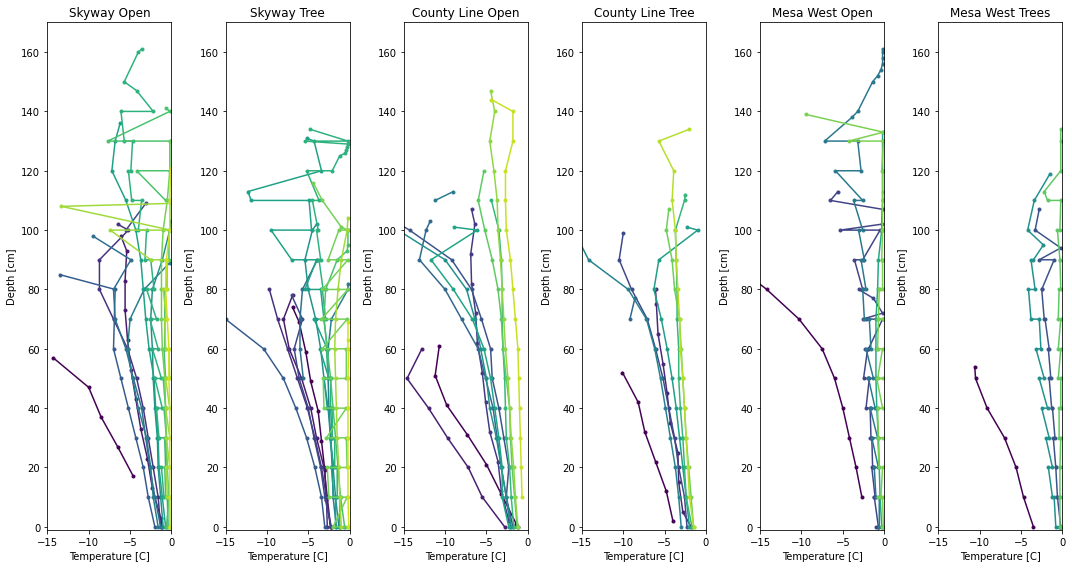

In [6]:
# 1. use the list of Time Series sites from above 
sites = gm_ts_sites

# 2. setup the subplot for each site 
fig, axes = plt.subplots(len(sites)%6+1, 6, figsize=(15, 8))

# setup the colorbar
cmap = matplotlib.cm.get_cmap('viridis')

# 3. loop over sites and select the data parameter ('temperature')
for i, site in enumerate(sites):
    
    # query the database by site and for temperature profile data 
    qry = session.query(LayerData).filter(LayerData.site_id.in_([site])).filter(LayerData.type == 'temperature') 
    
    # convert to pandas dataframe  
    df = query_to_pandas(qry, engine)  
    
    # create list of the unique dates (LayerData will have a lot of repeated dates, we only need a list per visit, not per measurement)
    dates = sorted(df['date'].unique())
    
    # grab the plot for this site
    ax = axes.flatten()[i]
    
    # counter to help with plotting
    k=0
    
    
    # 4. loop over dates & plot temperature profile
    for j, date in enumerate(dates):
        
        # grab the temperature profile 
        profile = df[df.date == date]
        
        # don't plot it unless there is data, make sure the dataframe index is > 1
        if len(profile.index) > 0:            
            
            # sort by depth so samples that are taken out of order won't mess up the plot
            profile = profile.sort_values(by='depth')

            # cast as a float; layer profiles are always stored as strings
            profile['value'] = profile['value'].astype(float)

            # plot the temperature profile
            ax.plot(profile['value'], 
                    profile['depth'], 
                    marker='.',
                    color = cmap(k/len(dates)),
                    label=date) 
            # ax.legend()
            
            k+=1 
            
# 5. style the axes
for i, site in enumerate(sites):
    ax = axes.flatten()[i]
    ax.set_xlim(-15, 0)
    ax.set_ylim(-1, 170)
    ax.set_title(sites[i])
    ax.set_xlabel('Temperature [C]')
    ax.set_ylabel('Depth [cm]')

fig.tight_layout()

# close your database session
session.close()     

In [7]:
# query the sites for temperature
qry = session.query(LayerData).filter(LayerData.site_id.in_(gm_ts_sites)).filter(LayerData.type == 'lwc_vol')
                                      
df = query_to_geopandas(qry, engine)

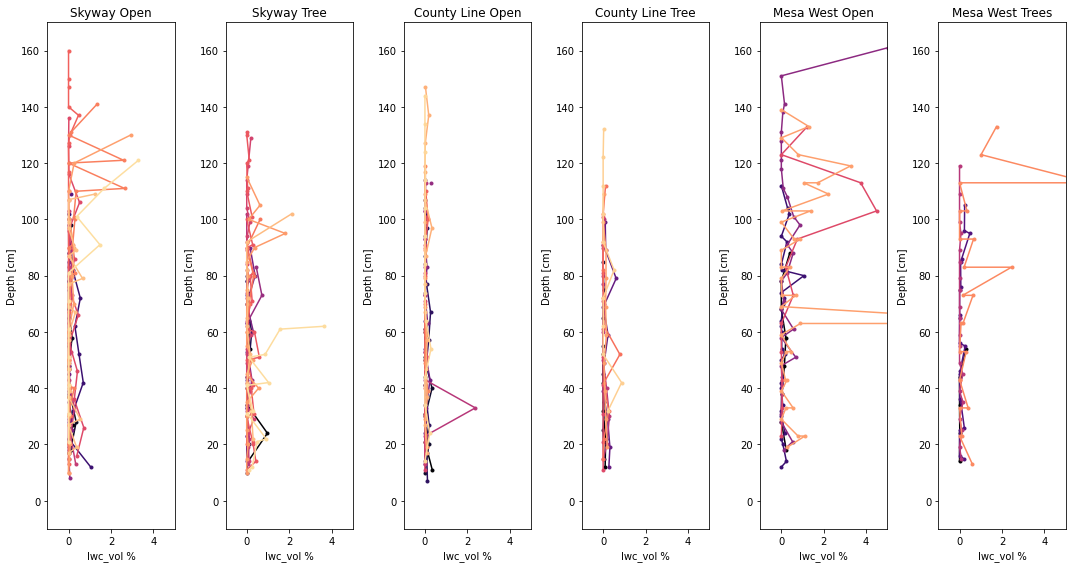

In [17]:
# 1. use the list of Time Series sites from above 
sites = gm_ts_sites

# 2. setup the subplot for each site 
fig, axes = plt.subplots(len(sites)%6+1, 6, figsize=(15, 8))

# setup the colorbar
cmap = matplotlib.cm.get_cmap('magma')

# 3. loop over sites and select the data parameter ('temperature')
for i, site in enumerate(sites):
    
    # query the database by site and for temperature profile data 
    qry = session.query(LayerData).filter(LayerData.site_id.in_([site])).filter(LayerData.type == 'lwc_vol') 
    
    # convert to pandas dataframe  
    df = query_to_pandas(qry, engine)  
    
    # create list of the unique dates (LayerData will have a lot of repeated dates, we only need a list per visit, not per measurement)
    dates = sorted(df['date'].unique())
    
    # grab the plot for this site
    ax = axes.flatten()[i]
    
    # counter to help with plotting
    k=0
    
    
    # 4. loop over dates & plot temperature profile
    for j, date in enumerate(dates):
        
        # grab the temperature profile 
        profile = df[df.date == date]
        
        # don't plot it unless there is data, make sure the dataframe index is > 1
        if len(profile.index) > 0:            
            
            # sort by depth so samples that are taken out of order won't mess up the plot
            profile = profile.sort_values(by='depth')

            # cast as a float; layer profiles are always stored as strings
            profile['value'] = profile['value'].astype(float)

            # plot the temperature profile
            ax.plot(profile['value'], 
                    profile['depth'], 
                    marker='.',
                    color = cmap(k/len(dates)),
                    label=date) 
            # ax.legend()
            
            k+=1 
            
# 5. style the axes
for i, site in enumerate(sites):
    ax = axes.flatten()[i]
    ax.set_xlim(-1, 5)
    ax.set_ylim(-10, 170)
    ax.set_title(sites[i])
    ax.set_xlabel('lwc_vol %')
    ax.set_ylabel('Depth [cm]')

fig.tight_layout()

# close your database session
session.close()     

In [9]:
# calculate SWE from depth and density



for i, site in enumerate(sites):
    
    # query the database by site and for density profile data 
    qry = session.query(LayerData).filter(LayerData.site_id.in_([site])).filter(LayerData.type == 'Density') 
    
    # convert to pandas dataframe  
    df = query_to_pandas(qry, engine)
    
    # drop the duplicates (issue to fix in database)
    df = df.drop_duplicates('depth')

    # Convert density to float
    df['value'] = df['value'].astype(float)

    # Calculate SWE
    swe_lambda = lambda row: row['value'] * (row['depth'] - row['bottom_depth']) / 100
    df['swe'] = df.apply(swe_lambda, axis=1)

SnowEx Database successfully loaded!


NameError: name 'sites' is not defined

In [25]:
# solve swe for one site and time (Skyway 4/22)

dt = datetime.date(2020, 3, 4)

qry = session.query(LayerData)

qry = qry.filter(LayerData.type == 'density').filter(LayerData.date == dt)

qry = qry.filter(LayerData.site_id == 'Skyway Open')

# convert to pandas dataframe  
df = query_to_pandas(qry, engine) 

df.head()

,site_name,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,...,depth,site_id,pit_id,bottom_depth,comments,sample_a,sample_b,sample_c,value,flags
0,Grand Mesa,2020-03-04,2022-06-30 22:43:04.375478+00:00,None,41317,None,2022-06-30,None,density,None,...,98.0,Skyway Open,COGMSO_20200304_1550,88.0,None,None,None,None,204.5,"MW, STLay"
1,Grand Mesa,2020-03-04,2022-06-30 22:43:04.375478+00:00,None,41318,None,2022-06-30,None,density,None,...,88.0,Skyway Open,COGMSO_20200304_1550,78.0,None,None,None,None,316.0,"MW, STLay"
2,Grand Mesa,2020-03-04,2022-06-30 22:43:04.375478+00:00,None,41319,None,2022-06-30,None,density,None,...,78.0,Skyway Open,COGMSO_20200304_1550,68.0,None,None,None,None,291.0,"MW, STLay"
3,Grand Mesa,2020-03-04,2022-06-30 22:43:04.375478+00:00,None,41320,None,2022-06-30,None,density,None,...,68.0,Skyway Open,COGMSO_20200304_1550,58.0,None,None,None,None,270.5,"MW, STLay"
4,Grand Mesa,2020-03-04,2022-06-30 22:43:04.375478+00:00,None,41321,None,2022-06-30,None,density,None,...,58.0,Skyway Open,COGMSO_20200304_1550,48.0,None,None,None,None,273.0,"MW, STLay"


In [34]:
# print(df['depth'], df['value'], df['bottom_depth'])
# 
foo = df.drop_duplicates(['depth'])
print(foo['depth'][5], foo['value'][5], foo['bottom_depth'][5])

48.0 277.0 38.0
